In [111]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette('Set2')

In [112]:
#Data Loading

df = pd.read_csv("netflix_dataset.csv")

In [113]:
#Checking Data

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Basic Data Understanding And Inspection

In [114]:
df.shape

(8807, 12)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [116]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [117]:
#Checking Null Values

df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Data Cleaning

In [118]:
#Handling Null Values

df['director'].fillna('N/A', inplace=True)
df['country'].fillna('N/A', inplace=True)
df['cast'].fillna('N/A', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [120]:
#Date Processing

df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

Univariate Analysis

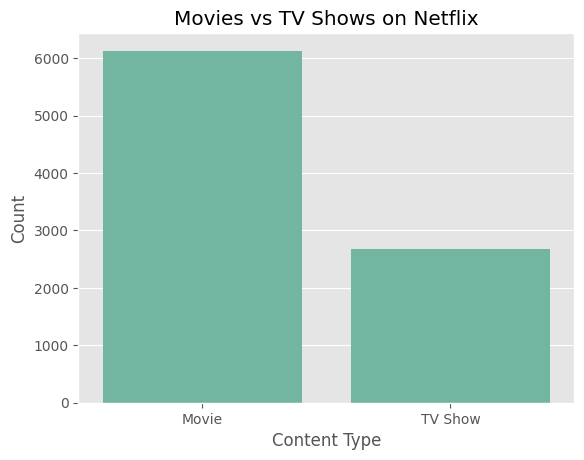

In [132]:
#Content Type Distribution

sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
# plt.savefig('Movies vs TV Shows on Netflix.png')
plt.show()

Insight:
Movies Dominate Netflix's Catalog.
TV shows are fewer but growing steadily.

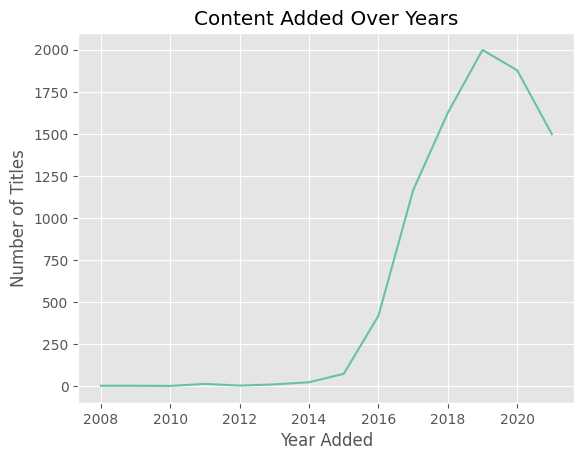

In [133]:
#Content Growth Over Time

df.groupby('year_added')['show_id'].count().plot(kind='line')
plt.title("Content Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
# plt.savefig('Content Added Over Years.png')
plt.show()

Insight:
Rapid content growth after 2015
Indicates aggresive expansion strategy

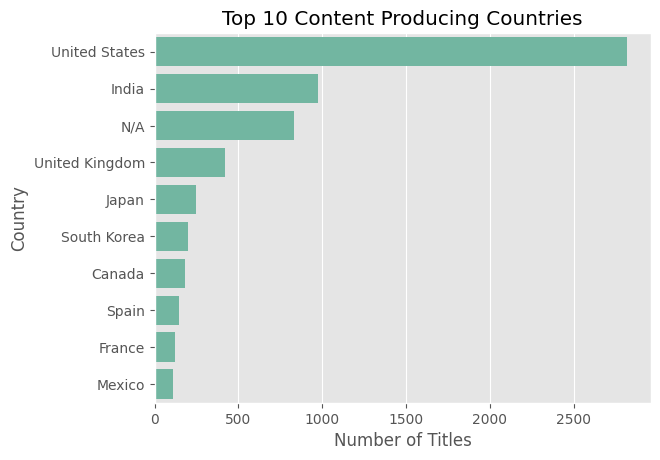

In [134]:
#Country-wise Content Analysis

top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
# plt.savefig('Top 10 Content Producing Countries.png')
plt.show()

Insight:
USA dominates Netflix content
India is a fast-growing market

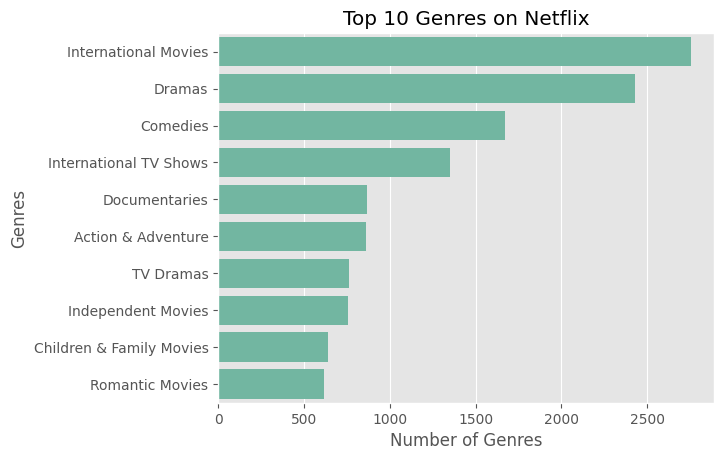

In [135]:
#Genre Analysis

genres = df['listed_in'].str.split(', ', expand=True).stack()

sns.barplot(x=genres.value_counts().head(10).values, y=genres.value_counts().head(10).index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Genres")
plt.ylabel("Genres")
# plt.savefig('Top 10 Genres on Netflix.png')
plt.show()

Insight:
Dramas & Comedies dominate.
Family & kids content is comparatively low.

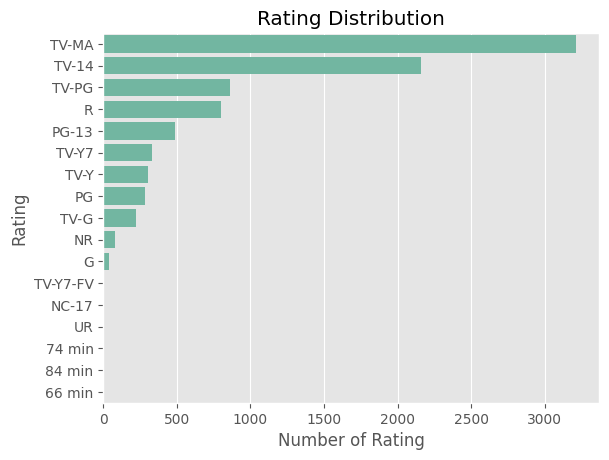

In [136]:
#Rating Distribution

sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Rating Distribution")
plt.xlabel("Number of Rating")
plt.ylabel("Rating")
# plt.savefig('Rating Distribution.png')
plt.show()

Insight:
TV-MA content dominates.
Platform focuses on adult audience.

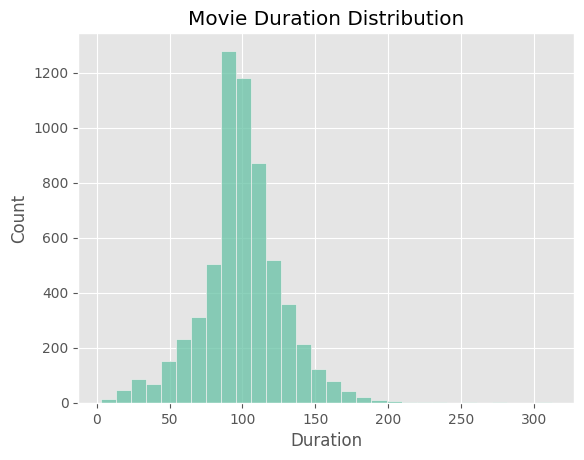

In [137]:
#Duration Analysis

df_movies = df[df['type']=='Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min','').astype(float)

sns.histplot(df_movies['duration'], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Count")
# plt.savefig('Movie Duration Distribution.png')
plt.show()

Insight:
Most movies are between 80–120 minutes.

Bivariate Analysis

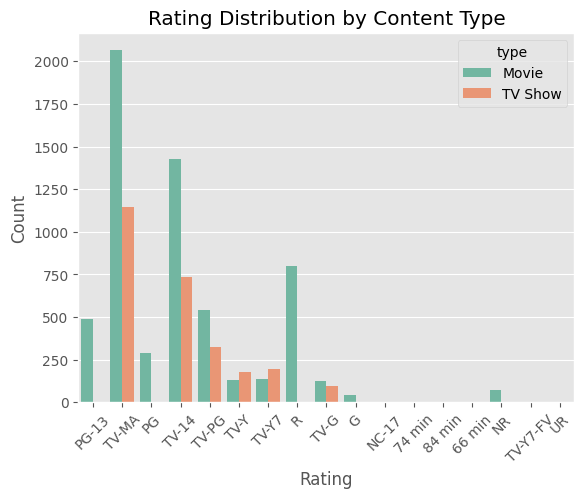

In [138]:
#Content Type vs Rating

sns.countplot(x='rating', hue='type', data=df)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
# plt.savefig('Rating Distribution by Content Type.png')
plt.show()

Insight:
Movies dominate TV-MA ratings.
TV shows are more balanced across age groups.

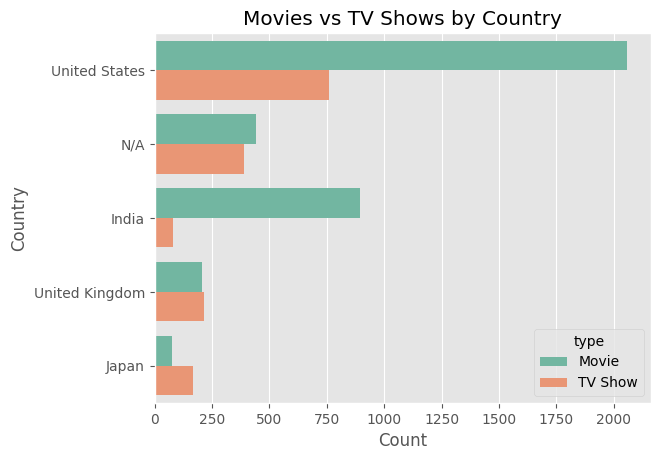

In [139]:
#Country vs Content Type

top_countries = df['country'].value_counts().head(5).index
sns.countplot(y='country', hue='type', data=df[df['country'].isin(top_countries)])
plt.title("Movies vs TV Shows by Country")
plt.xlabel("Count")
plt.ylabel("Country")
# plt.savefig('Movies vs TV Shows by Country.png')
plt.show()

Insights:
USA produces both formats heavily.
India focuses more on Movies → opportunity for TV series expansion.

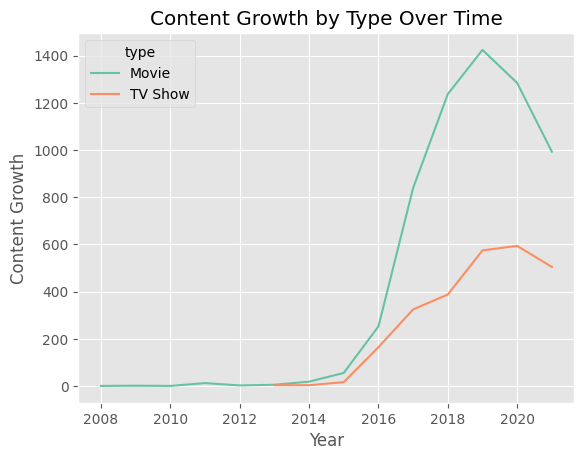

In [140]:
#Year Added vs Content Type (Trend Analysis)

df.groupby(['year_added','type']).size().unstack().plot(kind='line')
plt.title("Content Growth by Type Over Time")
plt.xlabel("Year")
plt.ylabel("Content Growth")
# plt.savefig('Content Growth by Type Over Time.png')
plt.show()

Insight:
TV Shows have increased significantly after 2016.
Netflix shifting toward binge-watch content.